In [1]:
import os
import struct
import numpy as np

def load_mnist(path, kind = 'train'):
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' %kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte'%kind)

    with open(labels_path,'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype = np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        images = np.fromfile(imgpath, dtype = np.uint8).reshape(len(labels),784)
        images = ((images/255.)-.5)*2
    return images, labels

X_train, y_train = load_mnist('',kind='train')
print('Train строк: %d, столбцов: %d'%(X_train.shape[0],X_train.shape[1]))

X_test, y_test = load_mnist('',kind='t10k')
print('Test строк: %d, столбцов: %d'%(X_test.shape[0],X_test.shape[1]))

Train строк: 60000, столбцов: 784
Test строк: 10000, столбцов: 784


In [2]:
import pandas as pd
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.998428,-0.999303,-0.999642,-0.999849,-0.999881,-0.999984,-1.0,-1.0,-1.0,-1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.047392,0.031029,0.022273,0.013230,0.013163,0.002718,0.0,0.0,0.0,0.0
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
50%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
75%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
max,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.992157,0.992157,0.984314,0.984314,0.992157,-0.513725,-1.0,-1.0,-1.0,-1.0


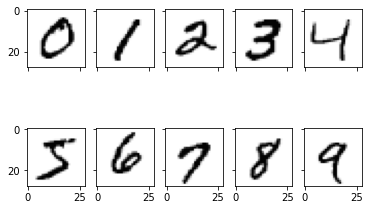

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2,ncols = 5,sharex = True,sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train ==i][0].reshape(28,28)
    ax[i].imshow(img,cmap='Greys')
plt.show()

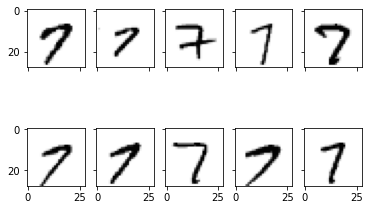

In [4]:
fig, ax = plt.subplots(nrows=2,ncols = 5,sharex = True,sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img,cmap = 'Greys')
plt.show()

In [5]:
np.savez_compressed('mnist_scaled.npz',X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

In [6]:
mnist = np.load('mnist_scaled.npz')

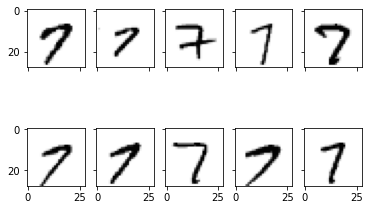

In [7]:
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]
fig, ax = plt.subplots(nrows=2,ncols = 5,sharex = True,sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img,cmap = 'Greys')
plt.show()

In [8]:
from neuro import NeuralNetMLP
nn = NeuralNetMLP(n_hidden = 100, l2 = 0.02,epochs = 500,eta=0.0005,minibatch_size = 100, shuffle = True, seed = 1)

In [9]:
nn.fit(X_train = X_train[:55000], y_train = y_train[:55000], X_valid = X_train[55000:],y_valid=y_train[55000:])

%d classes identified 10
all classes:  [0 1 2 3 4 5 6 7 8 9]
%d features identified
 784
y_train_enc
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


500/500 | Cost: 5420.46 | Train/Valid Acc.: 99.31%/98.24%  

In [10]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred)).astype(np.float)/X_test.shape[0]
print('праввильность при испытании: %.2f%%'%(acc*100))

праввильность при испытании: 97.77%


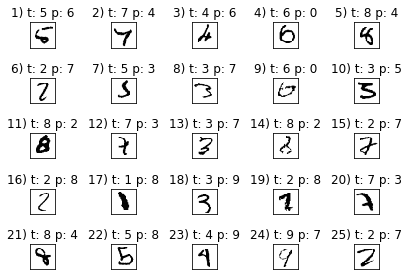

In [11]:
miscl_img = X_test[y_test!=y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28,28)
    ax[i].imshow(img,cmap = 'Greys',interpolation = 'nearest')
    ax[i].set_title('%d) t: %d p: %d'%(i+1, correct_lab[i],miscl_lab[i]) )
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()